In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

Criação da classe Dados, que vai conter as informações

In [2]:
# Leitura de dados

class Dados:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A, B, C):
                return A*x**2 + B*x + C
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A, B, C):
                return A*x**2 + B*x + C
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.d()[0]), max(self.d()[0]))  

        def y_model(self):
            def func(x, A, B, C):
                return A*x**2 + B*x + C
            return func(self.x_model(), self.par()[0], self.par()[1], self.par()[2])
        
        # preciso trocar o nome, mas x_ajuste e y_ajuste pega os valores de x a partir dos valores de y do plot anterior
        def x_ajuste(self):
            def inversa(y, A, B, C):
                a = A**(1/2)
                b = B/(2*a)
                c = C - b**2
                # return [a, b, c]
                return ((y-c)**(1/2) - b)/a
            return inversa(self.dp()[1], self.par()[0], self.par()[1], self.par()[2])
            

        def y_ajuste(self):
            return np.linspace(1, len(self.dp()[1]), len(self.dp()[1]))
       
        #parametros e erros da função de primeiro grau
        def par_reta(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = np.linspace(1, len(self.dp()[1]), len(self.dp()[1])),
                ydata = self.x_ajuste(),
            )
            return popt
        
        def perr_reta(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = np.linspace(1, len(self.dp()[1]), len(self.dp()[1])),
                ydata = self.x_ajuste(),
            )
            return np.sqrt(np.diag(pcov))
        
        #plot da reta
        def x_model_reta(self):
            return np.linspace(1, max(self.y_ajuste())+1)

        def y_model_reta(self):
            def func(x, A, B):
                return A*x + B
            return func(self.x_model_reta(), self.par_reta()[0], self.par_reta()[1])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)

dados1 = Dados(tabela('170-30-1,5-65'), tabela_picos('170-30-1,5-65'))
dados2 = Dados(tabela('180-30-1,5-65'), tabela_picos('180-30-1,5-65'))
dados3 = Dados(tabela('190-30-1,5-65'), tabela_picos('190-30-1,5-65'))

dados1.dp()[1]


[0.0769, 0.1414, 0.2445, 0.3979, 0.6004]

In [3]:
# Definição da função a ser plotada
def func(x, A, B, C):
    return A*x**2 + B*x + C

In [4]:
# Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
popt, pcov = curve_fit(
    f = func,
    xdata = dados1.dp()[0],
    ydata = dados1.dp()[1],
#     sigma = Dy
)

A_p, B_p, C_p = popt
perr = np.sqrt(np.diag(pcov))
DA, DB, DC = perr

print("A:", A_p,"+-", DA)
print("B:", B_p,"+-", DB)
print("C:", C_p,"+-", DC)

A: 0.0010740756241752038 +- 2.623145786923544e-05
B: -0.0140202620357163 +- 0.0010475535601667126
C: 0.10570279318704454 +- 0.009626816576099775


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/3534431966.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'LightCoral')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/3534431966.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico2 = grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'LightBlue')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/3534431966.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico2 = grafico.plot(dados3.d()[0], dados3.d()[1], 'D', marker = '.', color = 'LightGreen'

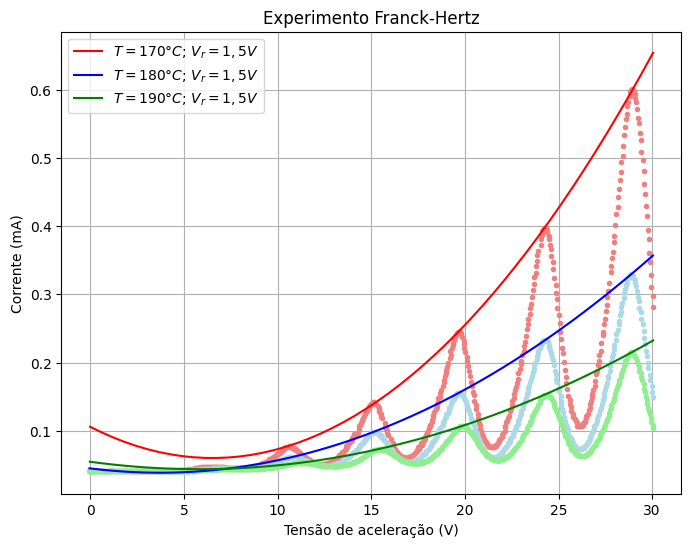

In [5]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'LightCoral')
grafico2 = grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'LightBlue')
grafico2 = grafico.plot(dados3.d()[0], dados3.d()[1], 'D', marker = '.', color = 'LightGreen')

# plot do ajuste
grafico.plot(dados1.x_model(), dados1.y_model(),  color = 'red', label = '$T= 170°C$; $V_r = 1,5 V$')
grafico.plot(dados2.x_model(), dados2.y_model(),  color = 'blue', label = '$T= 180°C$; $V_r = 1,5 V$')
grafico.plot(dados3.x_model(), dados3.y_model(),  color = 'green', label = '$T= 190°C$; $V_r = 1,5 V$')

grafico.grid(True)
grafico.set_xlabel('Tensão de aceleração (V)') # eixo x
grafico.set_ylabel('Corrente (mA)') # eixo y
grafico.set_title('Experimento Franck-Hertz') #título
grafico.legend(loc = 'upper left')

#    plt.savefig('Acr25graus.png')
plt.show()


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/2128176658.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/2128176658.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  parabola = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')


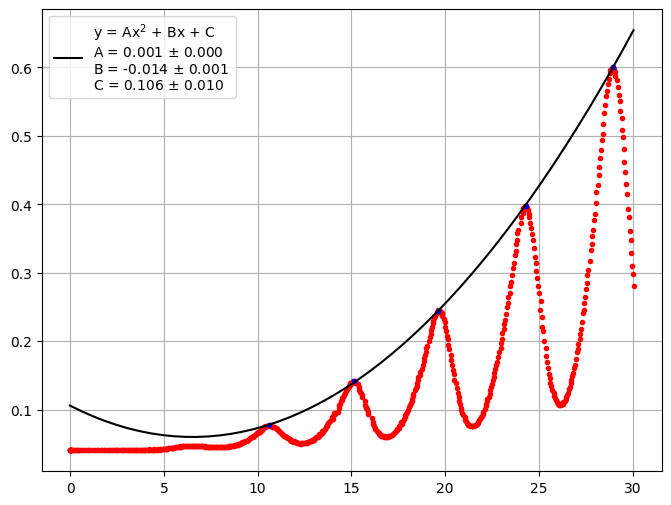

In [6]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
parabola = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
# plot do ajuste
grafico.plot(dados1.x_model(), dados1.y_model(),  color = 'black', label= f'y = Ax$^2$ + Bx + C \nA = {A_p:.3f} $\pm$ {DA:.3f} \nB = {B_p:.3f} $\pm$ {DB:.3f} \nC = {C_p:.3f} $\pm$ {DC:.3f}' )
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
#    grafico.set_xlabel('Ângulo (rad)') # eixo x
#    grafico.set_ylabel('Voltagem (V)') # eixo y
#    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)') #título
grafico.legend(loc = 'upper left')
#    plt.savefig('Acr25graus.png')

plt.show()


In [7]:
# x_ajuste = np.interp(dados1.dp()[1], yModel, xModel)

# x_ajuste = np.array(x_ajuste)

# x_ajuste

# len(dados1.dp()[1])
# y_ajuste = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1]))

def func2(y, A, B, C):
    a = A**(1/2)
    b = B/(2*a)
    c = C - b**2
    # return [a, b, c]
    return ((y-c)**(1/2) - b)/a

pontos = func2(dados1.dp()[1], dados1.par()[0], dados1.par()[1], dados1.par()[2])

dados1.par()
pontos


array([10.49919393, 15.23485751, 19.63475896, 24.264833  , 28.95826789])

In [8]:
# Definição da função a ser plotada
def func(x, A, B):
    return A*x + B

In [9]:
# # Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
# popt, pcov = curve_fit(
#     f = func,
#     xdata = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1])),
#     ydata = x_ajuste,
# )

# A_p, B_p= popt
# perr = np.sqrt(np.diag(pcov))
# DA, DB = perr

# print("A:", A_p,"+-", DA)
# print("B:", B_p,"+-", DB)

In [10]:
dados1.x_ajuste()

array([10.49919393, 15.23485751, 19.63475896, 24.264833  , 28.95826789])

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/1075522475.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico1 = grafico.plot(dados1.y_ajuste(), dados1.x_ajuste(), 'D', marker = '.', color = 'red')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/1075522475.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados2.y_ajuste(), dados2.x_ajuste(), 'D', marker = '.', color = 'green')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75652/1075522475.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados3.y_ajuste(), dados3.x_ajuste(), 'D', marker = '.', color = 'blue')


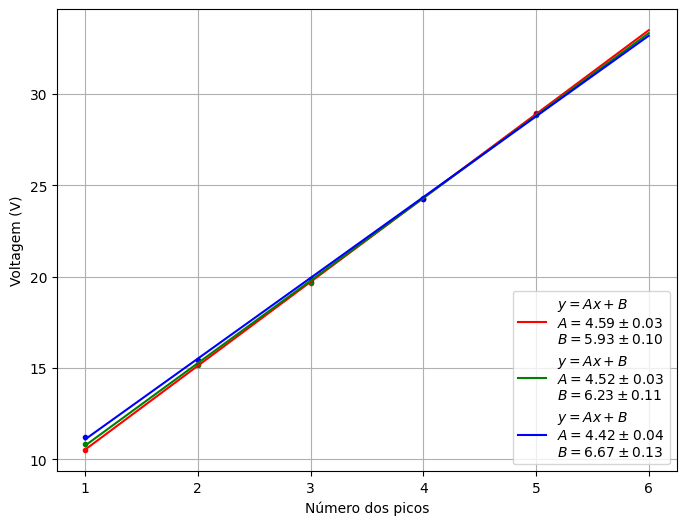

In [11]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico1 = grafico.plot(dados1.y_ajuste(), dados1.x_ajuste(), 'D', marker = '.', color = 'red')
grafico.plot(dados2.y_ajuste(), dados2.x_ajuste(), 'D', marker = '.', color = 'green')
grafico.plot(dados3.y_ajuste(), dados3.x_ajuste(), 'D', marker = '.', color = 'blue')

# plot do ajuste
grafico.plot(dados1.x_model_reta(), dados1.y_model_reta(),  color = 'red', label = f"$y = Ax + B$ \n$A = {dados1.par_reta()[0]: .2f} \pm {dados1.perr_reta()[0]: .2f} $\n$B = {dados1.par_reta()[1]: .2f} \pm {dados1.perr_reta()[1]: .2f}$")
grafico.plot(dados2.x_model_reta(), dados2.y_model_reta(),  color = 'green', label = f"$y = Ax + B$ \n$A = {dados2.par_reta()[0]: .2f} \pm {dados2.perr_reta()[0]: .2f} $\n$B = {dados2.par_reta()[1]: .2f} \pm {dados2.perr_reta()[1]: .2f}$")
grafico.plot(dados3.x_model_reta(), dados3.y_model_reta(),  color = 'blue', label = f"$y = Ax + B$ \n$A = {dados3.par_reta()[0]: .2f} \pm {dados3.perr_reta()[0]: .2f} $\n$B = {dados3.par_reta()[1]: .2f} \pm {dados3.perr_reta()[1]: .2f}$")
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('Número dos picos') # eixo x
grafico.set_ylabel('Voltagem (V)') # eixo y
#    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)')
grafico.legend(loc = 'lower right')

#    plt.savefig('Acr25graus.png')
plt.show()